In [2]:
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
import random

class Dice:

    def roll(self):
        roll = random.randint(1,6)
        return roll


class Opponent:

    def __init__(self, name = "Pig Opponent"):
        self.dice = Dice()
        self.score = 0
        self.total_score = 0
        self.count = 0
        self.name = name
        
    def __str__(self):
        return self.name

    def roll(self):
        return self.dice.roll()

    def round_score(self):
        roll = self.roll()
        if roll > 1:
            self.score += roll
        else:
            self.score = 0

        return self.score

    def roll_or_hold(self):
        response = self.decision()
        self.decision()
        if response == 'hold':

            self.total_score += self.score
            self.score = 0
            self.count = 0
            return self.total_score
        elif response == 'roll':

            self.round_score()

            return self.roll_or_hold()
        elif response == 'bust':

            self.count = 0
            return self.total_score

    def decision(self):
        if self.count > 0:
            return "hold"
        elif self.score == 0 and self.count > 0:
            return "bust"
        else:
            self.count += 1
            return "roll"


class Player:

    def __init__(self):
        self.dice = Dice()
        self.score = 0
        self.total_score = 0
        self.count = 0

    def roll(self):
        return self.dice.roll()

    def round_score(self):
        roll = self.roll()
        if roll > 1:
            self.score += roll
        else:
            self.score = 0
        return self.score

    def roll_or_hold(self):
        if self.score == 0 and self.count > 0:
            print(self.count)
            print("You bust")
            self.count = 0
            return self.total_score
        else:
            response = input(
            "\nDo you want to roll or hold? (Roll/Hold)".lower())
            if response == 'hold':
                print("You hold")
                self.total_score += self.score
                self.score = 0
                self.count = 0
                return self.total_score
            if response == 'roll':
                print("You roll")
                self.round_score()
                print("your score this round: ", self.score)
                print("your total score: ", self.total_score)
                self.count += 1
                return self.roll_or_hold()

In [6]:
class PigCount(Opponent):
    
    def decision(self):
        if self.count >= 5:
            return "hold"
        elif self.score == 0 and self.count > 0:
            return "bust"
        else:
            self.count += 1
            return "roll"

In [89]:
class PigMoves15(Opponent):

    def decision(self):
        if self.score > 15:
            return "hold"
        elif self.score == 0 and self.count > 0:
            return "bust"
        else:
            self.count += 1
            return "roll"

In [90]:
class PigMoves16(Opponent):

    def decision(self):
        if self.score > 16:
            return "hold"
        elif self.score == 0 and self.count > 0:
            return "bust"
        else:
            self.count += 1
            return "roll"

In [102]:
class PigMoves17(Opponent):

    def decision(self):
        if self.score > 17:
            return "hold"
        elif self.score == 0 and self.count > 0:
            return "bust"
        else:
            self.count += 1
            return "roll"

In [126]:
class PigMoves18(Opponent):

    def decision(self):
        if self.score > 18:
            return "hold"
        elif self.score == 0 and self.count > 0:
            return "bust"
        else:
            self.count += 1
            return "roll"

In [157]:
class PigMoves21(Opponent):

    def decision(self):
        if self.score > 21:
            return "hold"
        elif self.score == 0 and self.count > 0:
            return "bust"
        else:
            self.count += 1
            return "roll"

In [138]:
class PigMoves20(Opponent):

    def decision(self):
        if self.score > 20:
            return "hold"
        elif self.score == 0 and self.count > 0:
            return "bust"
        else:
            self.count += 1
            return "roll"

In [158]:
class Game:

    def __init__(self):
        self.p1 = PigMoves20()
        self.p2 = PigMoves21()
        self.round_count = 0

    def p1_turn(self):
        self.p1.roll_or_hold()

    def p2_turn(self):
        self.p2.roll_or_hold()

    def play_round_me(self):
            self.p1_turn()
            self.p2_turn()

    def play_round_you(self):
            self.p2_turn()
            self.p1_turn()

    def full_game(self):
        while self.round_count < 7:
            self.play_round_me()
            self.round_count += 1
        if self.p1.total_score > self.p2.total_score:
            return "{} BEATS {}! Final score is {}, to {}.".format(
            self.p1, self.p2, self.p1.total_score, self.p2.total_score)
        else:
            return "{} BEATS {}! Final score is {}, to {}.".format(
            self.p2, self.p1, self.p1.total_score, self.p2.total_score)
        
steve = Game()
steve.full_game()

'Pig Opponent BEATS Pig Opponent! Final score is 25, to 46.'

In [159]:
class FullGame(Game):
    
    def full_game(self):
        while self.round_count < 7:
            self.play_round_me()
            self.round_count += 1
        if self.p1.total_score > self.p2.total_score:
            return 1
        elif self.p1.total_score < self.p2.total_score:
            return 2
        elif self.p1.total_score == self.p2.total_score:
            return 3
        
    def game_scores(self):
        return self.p1.total_score, self.p2.total_score

In [160]:
def pig_trials(number = 10):
    game_wins = []
    final_score = []
    for num in range(number):
        game = FullGame()
        game_wins.append(game.full_game())
        final_score.append(game.game_scores())
    return game_wins, final_score

In [161]:
trial_results = []
score_results = []
for number in [10, 100, 1000, 10000, 100000]:
    trial_results.append(pig_trials(number)[0])
    score_results.append(pig_trials(number)[1])

In [162]:
score_p1 = 0
score_p2 = 0
for trials in score_results:
    print(trials)
    break

[(23, 0), (44, 50), (89, 25), (21, 46), (69, 119), (68, 47), (65, 47), (91, 50), (45, 46), (108, 75)]


In [163]:
average_p1 = 0
average_p2 = 0
trials_average = []

for trials in score_results:
    average_p1 = 0
    average_p2 = 0
    for scores in trials:
        average_p1 += scores[0]
        average_p2 += scores[1]
    average_p1 = average_p1/len(trials)
    average_p2 = average_p2/len(trials)
    trials_average.append((average_p1, average_p2))
print(trials_average[4])

(56.91848, 56.91628)


In [164]:
one = 0
two = 0
tie = 0
total_results = []
for results in trial_results:
    one = 0
    two = 0
    tie = 0
    one += results.count(1)
    two += results.count(2)
    tie += results.count(3)
    total_results.append([one, two, tie])

# 15 count vs 16 moves

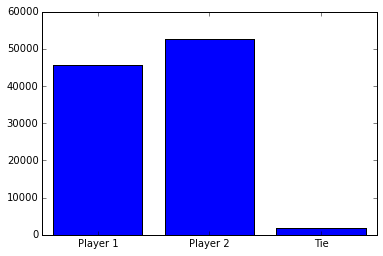

In [100]:
y = total_results[4]
x = range(len(y))
z = "Player 1", "Player 2", "Tie"

plt.bar(x, y, align = "center")
plt.xticks([0,1,2], z)

fig = plt.gcf()

# 15 count vs 16 count score average

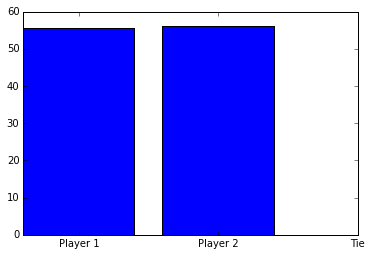

In [101]:
y = trials_average[4]
x = range(len(y))
z = "Player 1", "Player 2", "Tie"

plt.bar(x, y, align = "center")
plt.xticks([0,1,2], z)

fig = plt.gcf()

# 17 count vs 16 count

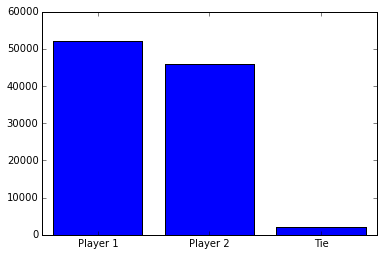

In [111]:
y = total_results[4]
x = range(len(y))
z = "Player 1", "Player 2", "Tie"

plt.bar(x, y, align = "center")
plt.xticks([0,1,2], z)

fig = plt.gcf()

# 17 count vs 16 count average

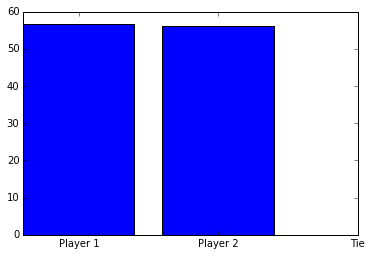

In [112]:
y = trials_average[4]
x = range(len(y))
z = "Player 1", "Player 2", "Tie"

plt.bar(x, y, align = "center")
plt.xticks([0,1,2], z)

fig = plt.gcf()

In [113]:
trials_average[4]

(56.60859, 56.17576)

# 17 count vs 18 count

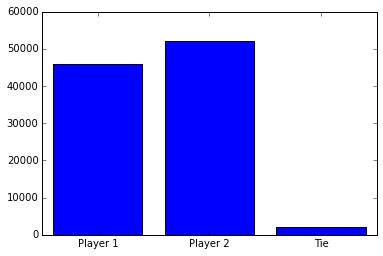

In [122]:
y = total_results[4]
x = range(len(y))
z = "Player 1", "Player 2", "Tie"

plt.bar(x, y, align = "center")
plt.xticks([0,1,2], z)

fig = plt.gcf()

# 17 count vs 18 count average

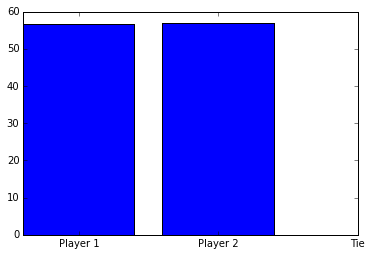

In [123]:
y = trials_average[4]
x = range(len(y))
z = "Player 1", "Player 2", "Tie"

plt.bar(x, y, align = "center")
plt.xticks([0,1,2], z)

fig = plt.gcf()

In [124]:
trials_average[4]

(56.6044, 56.97481)

# 19 count vs 18 count

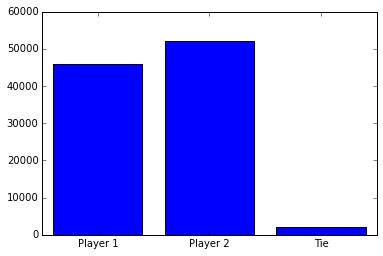

In [135]:
y = total_results[4]
x = range(len(y))
z = "Player 1", "Player 2", "Tie"

plt.bar(x, y, align = "center")
plt.xticks([0,1,2], z)

fig = plt.gcf()

# 19 count vs 18 count average

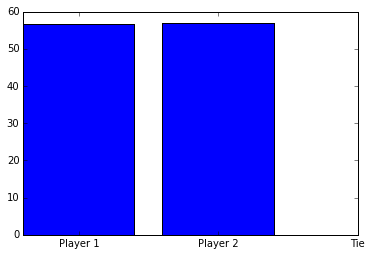

In [136]:
y = trials_average[4]
x = range(len(y))
z = "Player 1", "Player 2", "Tie"

plt.bar(x, y, align = "center")
plt.xticks([0,1,2], z)

fig = plt.gcf()

In [137]:
trials_average[4]

(56.6226, 56.92437)

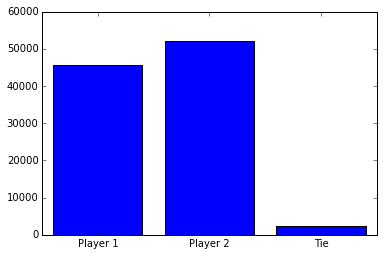

In [165]:
y = total_results[4]
x = range(len(y))
z = "Player 1", "Player 2", "Tie"

plt.bar(x, y, align = "center")
plt.xticks([0,1,2], z)

fig = plt.gcf()

In [166]:
trials_average[4]

(56.91848, 56.91628)